In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
data=pd.read_csv("life_expectancy.csv")
data.head(5)

,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33
2,South Sudan,60.75,57.74,54.76
3,Lesotho,60.44,57.80,55.03
4,Central African Republic,59.56,57.67,55.51


In [6]:
data.shape

(200, 4)

In [8]:
data.isnull().sum()

Country                                 0
Sum of Females  Life Expectancy         0
Sum of Life Expectancy  (both sexes)    0
Sum of Males  Life Expectancy           0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [11]:
data.describe()

,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
count,200.000000,200.000000,200.000000
mean,76.776900,74.133700,71.517200
std,8.820332,8.571318,8.419633
min,54.940000,54.640000,53.360000
25%,71.300000,68.732500,66.270000
50%,77.955000,74.700000,71.250000
75%,81.985000,79.062500,76.565000
max,149.220000,143.280000,137.640000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               200 non-null    object 
 1   Sum of Females  Life Expectancy       200 non-null    float64
 2   Sum of Life Expectancy  (both sexes)  200 non-null    float64
 3   Sum of Males  Life Expectancy         200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [13]:
data["Sum of Life Expectancy  (both sexes)"].min()

54.64

In [14]:
data["Sum of Life Expectancy  (both sexes)"].max()

143.28

In [ ]:
#

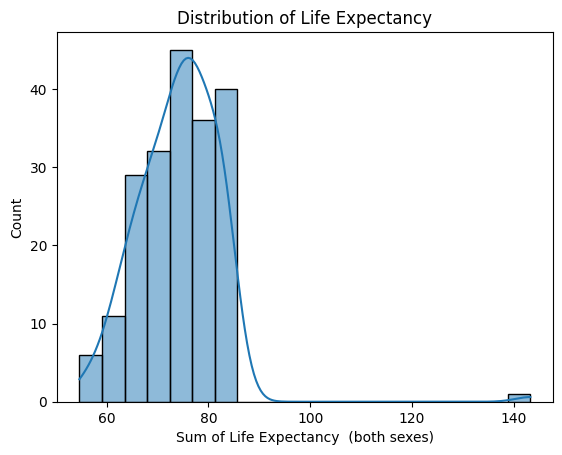

In [19]:
sns.histplot(data['Sum of Life Expectancy  (both sexes)'], kde=True, bins=20)
plt.title('Distribution of Life Expectancy')
plt.show()

# Boxplots to Detect Outliers

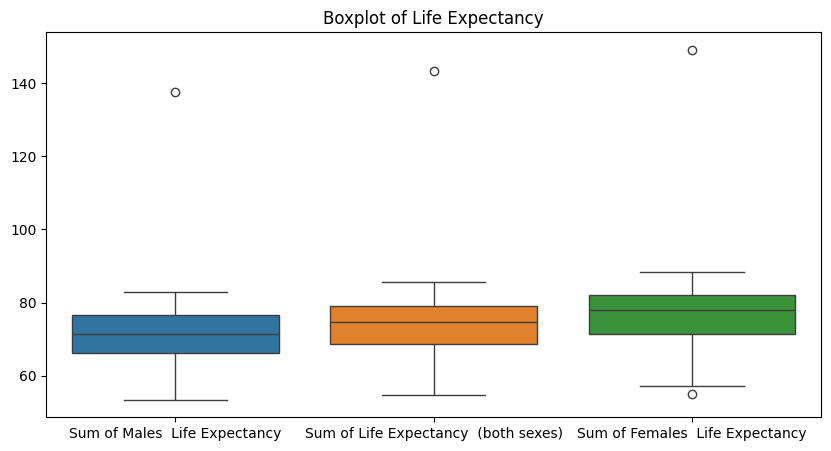

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(data=data[['Sum of Males  Life Expectancy', 'Sum of Life Expectancy  (both sexes)', 'Sum of Females  Life Expectancy']])
plt.title('Boxplot of Life Expectancy')
plt.show()

# Gender Comparison

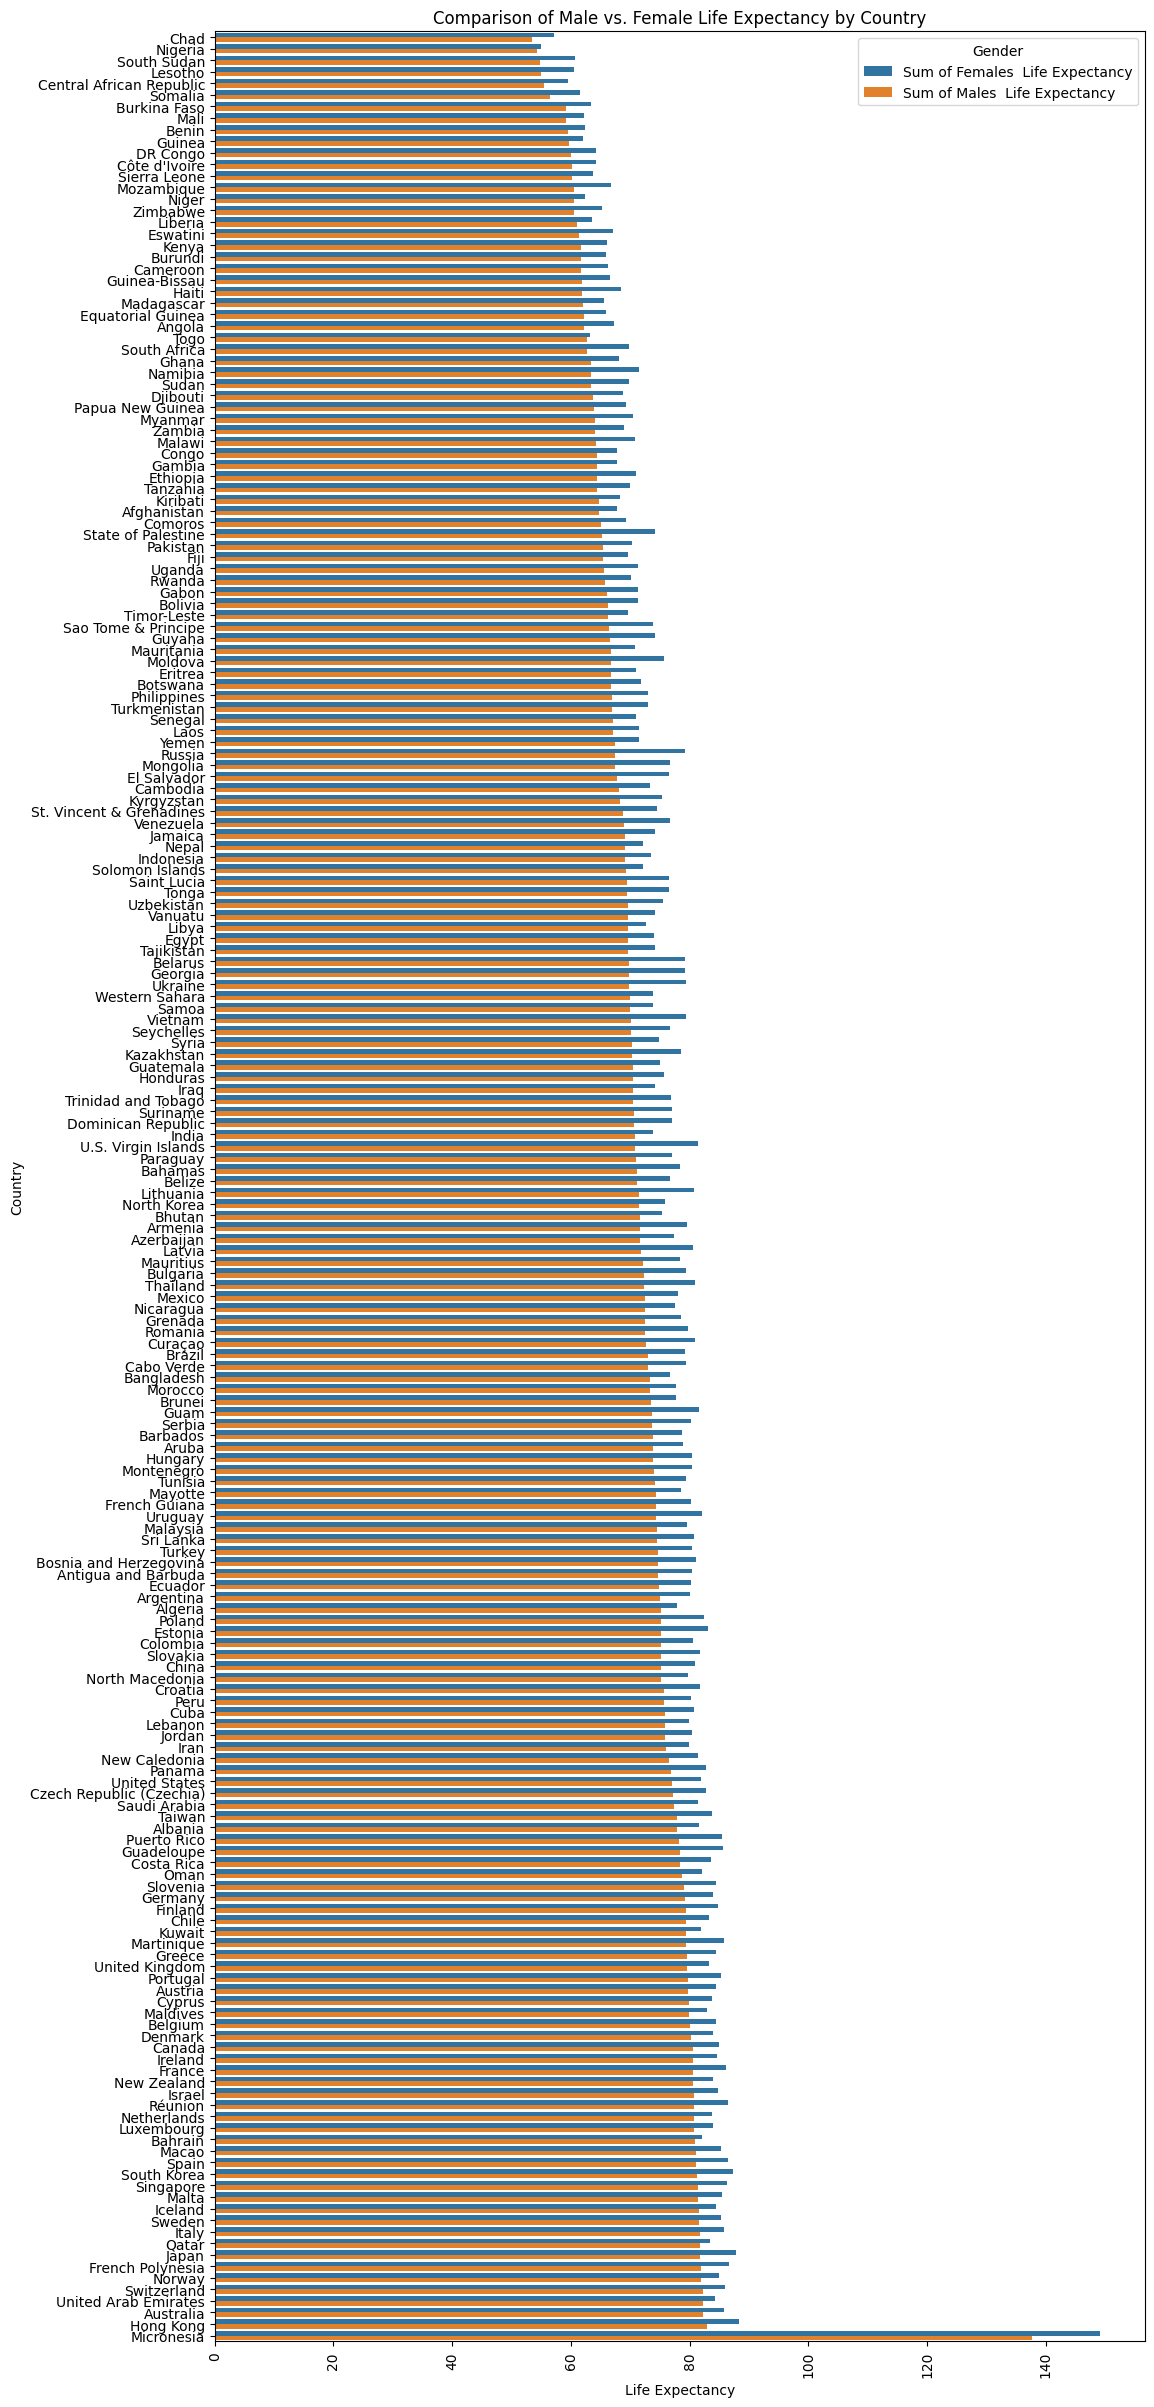

In [29]:
df_melted = data.melt(id_vars=['Country'], 
                    value_vars=['Sum of Females  Life Expectancy', 'Sum of Males  Life Expectancy'], 
                    var_name='Gender', value_name='Life Expectancy')

plt.figure(figsize=(12,30))
sns.barplot(y='Country', x='Life Expectancy', hue='Gender', data=df_melted)
plt.xticks(rotation=90)
plt.title('Comparison of Male vs. Female Life Expectancy by Country')
plt.show()


# Country-wise Analysis

In [43]:
df_sorted = data.sort_values(by='Sum of Life Expectancy  (both sexes)', ascending=False)

In [44]:
print("Top 5 countries with highest life expectancy:")
df_sorted.head()

Top 5 countries with highest life expectancy:


,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
199,Micronesia,149.22,143.28,137.64
198,Hong Kong,88.26,85.63,82.97
192,Japan,87.88,84.85,81.83
185,South Korea,87.28,84.43,81.32
193,French Polynesia,86.62,84.19,81.90


In [46]:
print("\nBottom 5 countries with lowest life expectancy:")
df_sorted.tail()


Bottom 5 countries with lowest life expectancy:


,Country,Sum of Females Life Expectancy,Sum of Life Expectancy (both sexes),Sum of Males Life Expectancy
3,Lesotho,60.44,57.80,55.03
2,South Sudan,60.75,57.74,54.76
4,Central African Republic,59.56,57.67,55.51
0,Chad,57.19,55.24,53.36
1,Nigeria,54.94,54.64,54.33


# Gender Gap in Life Expectancy

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_37014/1298665569.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_sorted['Country'], y=df_sorted['Gender Gap'], palette='coolwarm')


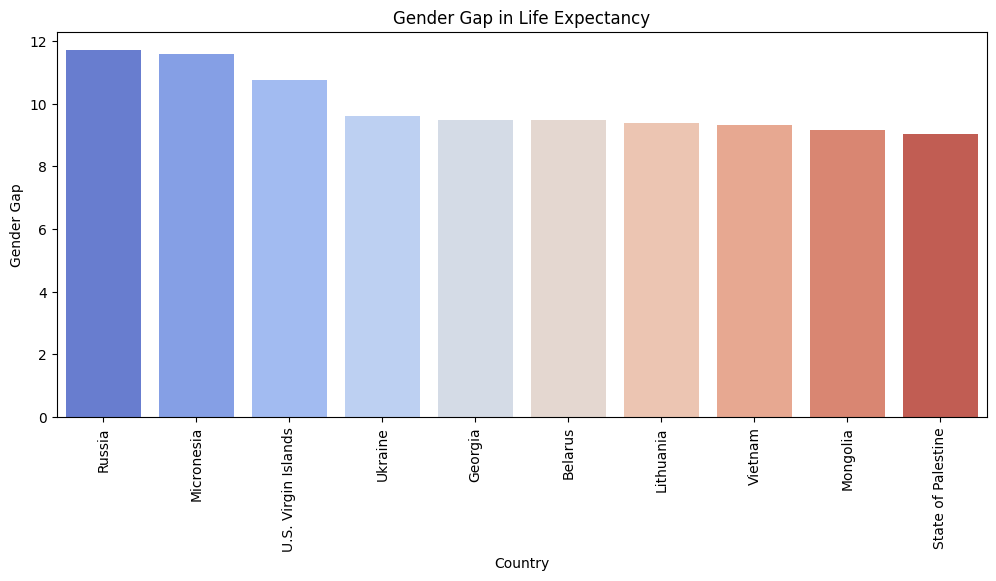

In [52]:
data['Gender Gap'] = data['Sum of Females  Life Expectancy'] - data['Sum of Males  Life Expectancy']
df_sorted = data.sort_values(by='Gender Gap', ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=df_sorted['Country'], y=df_sorted['Gender Gap'], palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Gender Gap in Life Expectancy')
plt.show()